# Example notebook to plot data queried directly from the EFD

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as py
%matplotlib inline

This next step uses sqlalchemy to create a connection to the EFD. It uses `mysql` and `pymysql` to handle the connection. You can install `mysql` on Mac with `brew install mysql`. To install `pymysql` simply do `pip install pymysql` or `easy_install pymysql`.

Note that on the following line I suppresed the actuall information required to connect to the EFD. You need to find the parameters for the EFD you want to connect to.

In [2]:
engine = create_engine('mysql+pymysql://<user>:<passwd>@<ip_address>:<port>/<database>')

Now, use pandas (imported as pd, see first cell) to query the EFD and return a data frame (a table with data basically). 

In [3]:
data_frame = pd.read_sql_query('SELECT * FROM atcamera_wrebPower;', engine)

Show the first few lines of the data. 

In [4]:
data_frame.head()

,date_time,private_revCode,private_sndStamp,private_rcvStamp,private_seqNum,private_origin,private_host,digital_V,digital_I,analog_V,...,clkLow_V,clkLow_I,od_V,od_I,dphi_V,dphi_I,heater_V,heater_I,hvbias_V,hvbias_I
0,2018-08-14 18:34:12.274374,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,645.1,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
1,2018-08-14 18:34:12.275449,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.2,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
2,2018-08-14 18:34:12.276372,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.3,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
3,2018-08-14 18:34:12.278053,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.2,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0
4,2018-08-14 18:34:12.279707,LSST TEST REVCODE,1.534272e+09,1.534272e+09,0,1,0,5.0,651.3,7.0,...,11.0,34.7,28.0,26.7,10.0,6.5,12.0,0.0,-24.0,0.0


Now, it's time to do the plotting. 

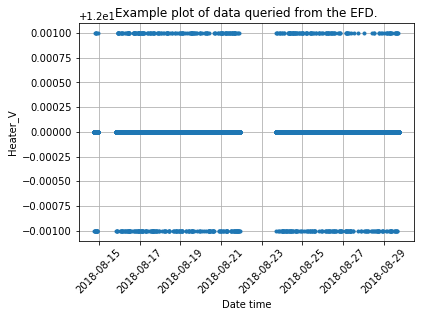

In [5]:
py.plot(data_frame['date_time'],data_frame['heater_V'],'.')
py.xticks(rotation=45)

py.title('Example plot of data queried from the EFD.')
py.xlabel('Date time')
py.ylabel('Heater_V')
py.grid()